In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
wineData=pd.read_csv('winequalityN.csv')

In [3]:
wineData.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wineData.shape

(6497, 13)

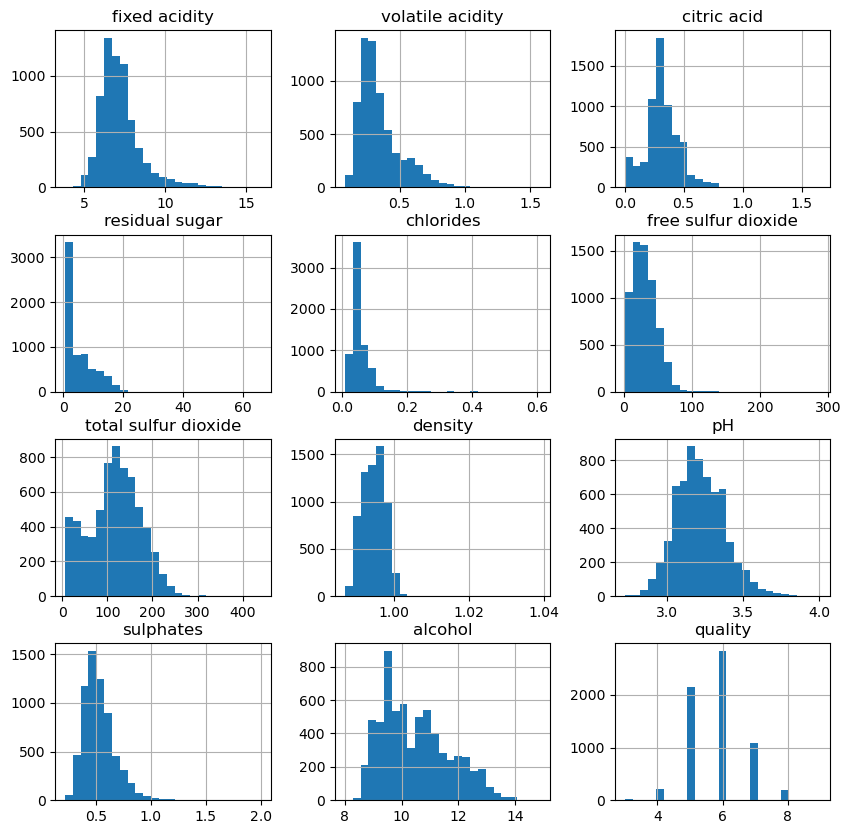

In [5]:
wineData.hist(bins=25,figsize=(10,10))
plt.show()

<AxesSubplot: >

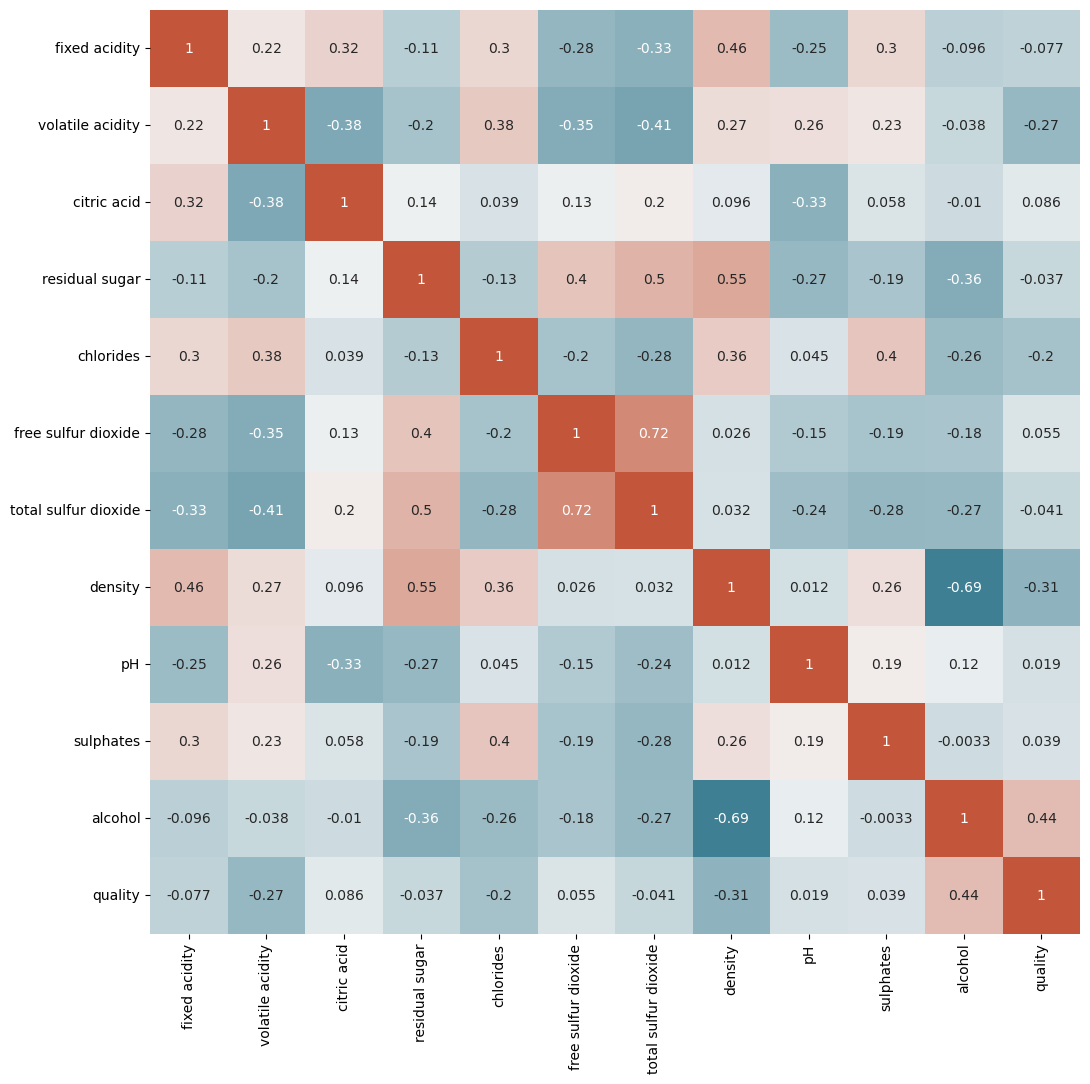

In [6]:
plt.figure(figsize=[12,12],facecolor='white')
sns.heatmap(wineData.corr(),annot=True, cbar=False,cmap=sns.diverging_palette(220, 20, as_cmap=True) )

In [7]:
#finding the column with 
for x in range(len(wineData.corr().columns)):
    for y in range(x):
        if abs(wineData.corr().iloc[x,y]) >0.7:
            column1 = wineData.corr().columns[x]
            column2 = wineData.corr().columns[y]
            print(column1)
            print(column2)

total sulfur dioxide
free sulfur dioxide


In [8]:
new_df=wineData.drop('total sulfur dioxide',axis=1)

In [9]:
new_df=wineData.drop('free sulfur dioxide',axis=1)

In [10]:
wineData.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
for column in wineData.columns:
  if wineData[column].isnull().sum() > 0:
    wineData[column] = wineData[column].fillna(wineData[column].mean())

In [12]:
wineData.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
wineData['best quality'] = [1 if data > 7 else 0 for data in wineData.quality]

In [14]:
wineData.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [15]:
wineData.replace({'white': 1, 'red': 0}, inplace=True)
wineData.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [16]:
features = wineData.drop(['quality', 'best quality'], axis=1)
print(features)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.0             0.270         0.36            20.7   
1        1            6.3             0.300         0.34             1.6   
2        1            8.1             0.280         0.40             6.9   
3        1            7.2             0.230         0.32             8.5   
4        1            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6492     0            6.2             0.600         0.08             2.0   
6493     0            5.9             0.550         0.10             2.2   
6494     0            6.3             0.510         0.13             2.3   
6495     0            5.9             0.645         0.12             2.0   
6496     0            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         

In [17]:
x_train,x_test,y_train,y_test = train_test_split(features, wineData['best quality'],test_size=0.3,random_state=40)

In [18]:
x_train.head() , x_test.shape, y_train.head()

(      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
 821      1            7.3          0.655000         0.20            10.2   
 5127     0            6.9          0.520000         0.25             2.6   
 2894     1            6.4          0.339691         0.36             1.4   
 3607     1            6.8          0.140000         0.18             1.4   
 5896     0            8.9          0.840000         0.34             1.4   
 
       chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
 821       0.071                 28.0                 212.0  0.99710  2.96   
 5127      0.081                 10.0                  37.0  0.99685  3.46   
 2894      0.044                 22.0                  68.0  0.99014  3.15   
 3607      0.047                 30.0                  90.0  0.99164  3.27   
 5896      0.050                  4.0                  10.0  0.99554  3.12   
 
       sulphates  alcohol  
 821        0.58      9.2  
 5127     

In [19]:
normalize = MinMaxScaler()
x_train = normalize.fit_transform(x_train)
x_test = normalize.fit_transform(x_test)
print(x_train)

[[1.         0.2892562  0.38333333 ... 0.17322835 0.20224719 0.17391304]
 [0.         0.25619835 0.29333333 ... 0.56692913 0.15730337 0.43478261]
 [1.         0.21487603 0.17312734 ... 0.32283465 0.15730337 0.53623188]
 ...
 [0.         0.33884298 0.38666667 ... 0.54330709 0.20224719 0.2173913 ]
 [0.         0.24793388 0.34       ... 0.52755906 0.25280899 0.24637681]
 [1.         0.19008264 0.16666667 ... 0.51181102 0.24157303 0.2173913 ]]


In [20]:
#using support vector classifier
svc = SVC(random_state=2020)
svc.fit(x_train, y_train)

SVC(random_state=2020)

In [21]:
predict_test = svc.predict(x_test)
print(predict_test)


[0 0 0 ... 0 0 0]


In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
score = metrics.accuracy_score(y_test,predict_test)
print("Accuracy prediction",score)

Accuracy prediction 0.9692307692307692


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1890
           1       0.00      0.00      0.00        60

    accuracy                           0.97      1950
   macro avg       0.48      0.50      0.49      1950
weighted avg       0.94      0.97      0.95      1950



C:\Users\Danny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Danny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
#Another way using decision tree
decision= DecisionTreeClassifier(random_state = 2020)
decision.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2020)

In [25]:
predict_test2 = decision.predict(x_test)
print(predict_test2)

[1 0 0 ... 1 0 0]


In [26]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
score = metrics.accuracy_score(y_test,predict_test2)
print("Accuracy prediction",score)

Accuracy prediction 0.8307692307692308


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_test2))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1890
           1       0.08      0.40      0.13        60

    accuracy                           0.83      1950
   macro avg       0.53      0.62      0.52      1950
weighted avg       0.95      0.83      0.88      1950



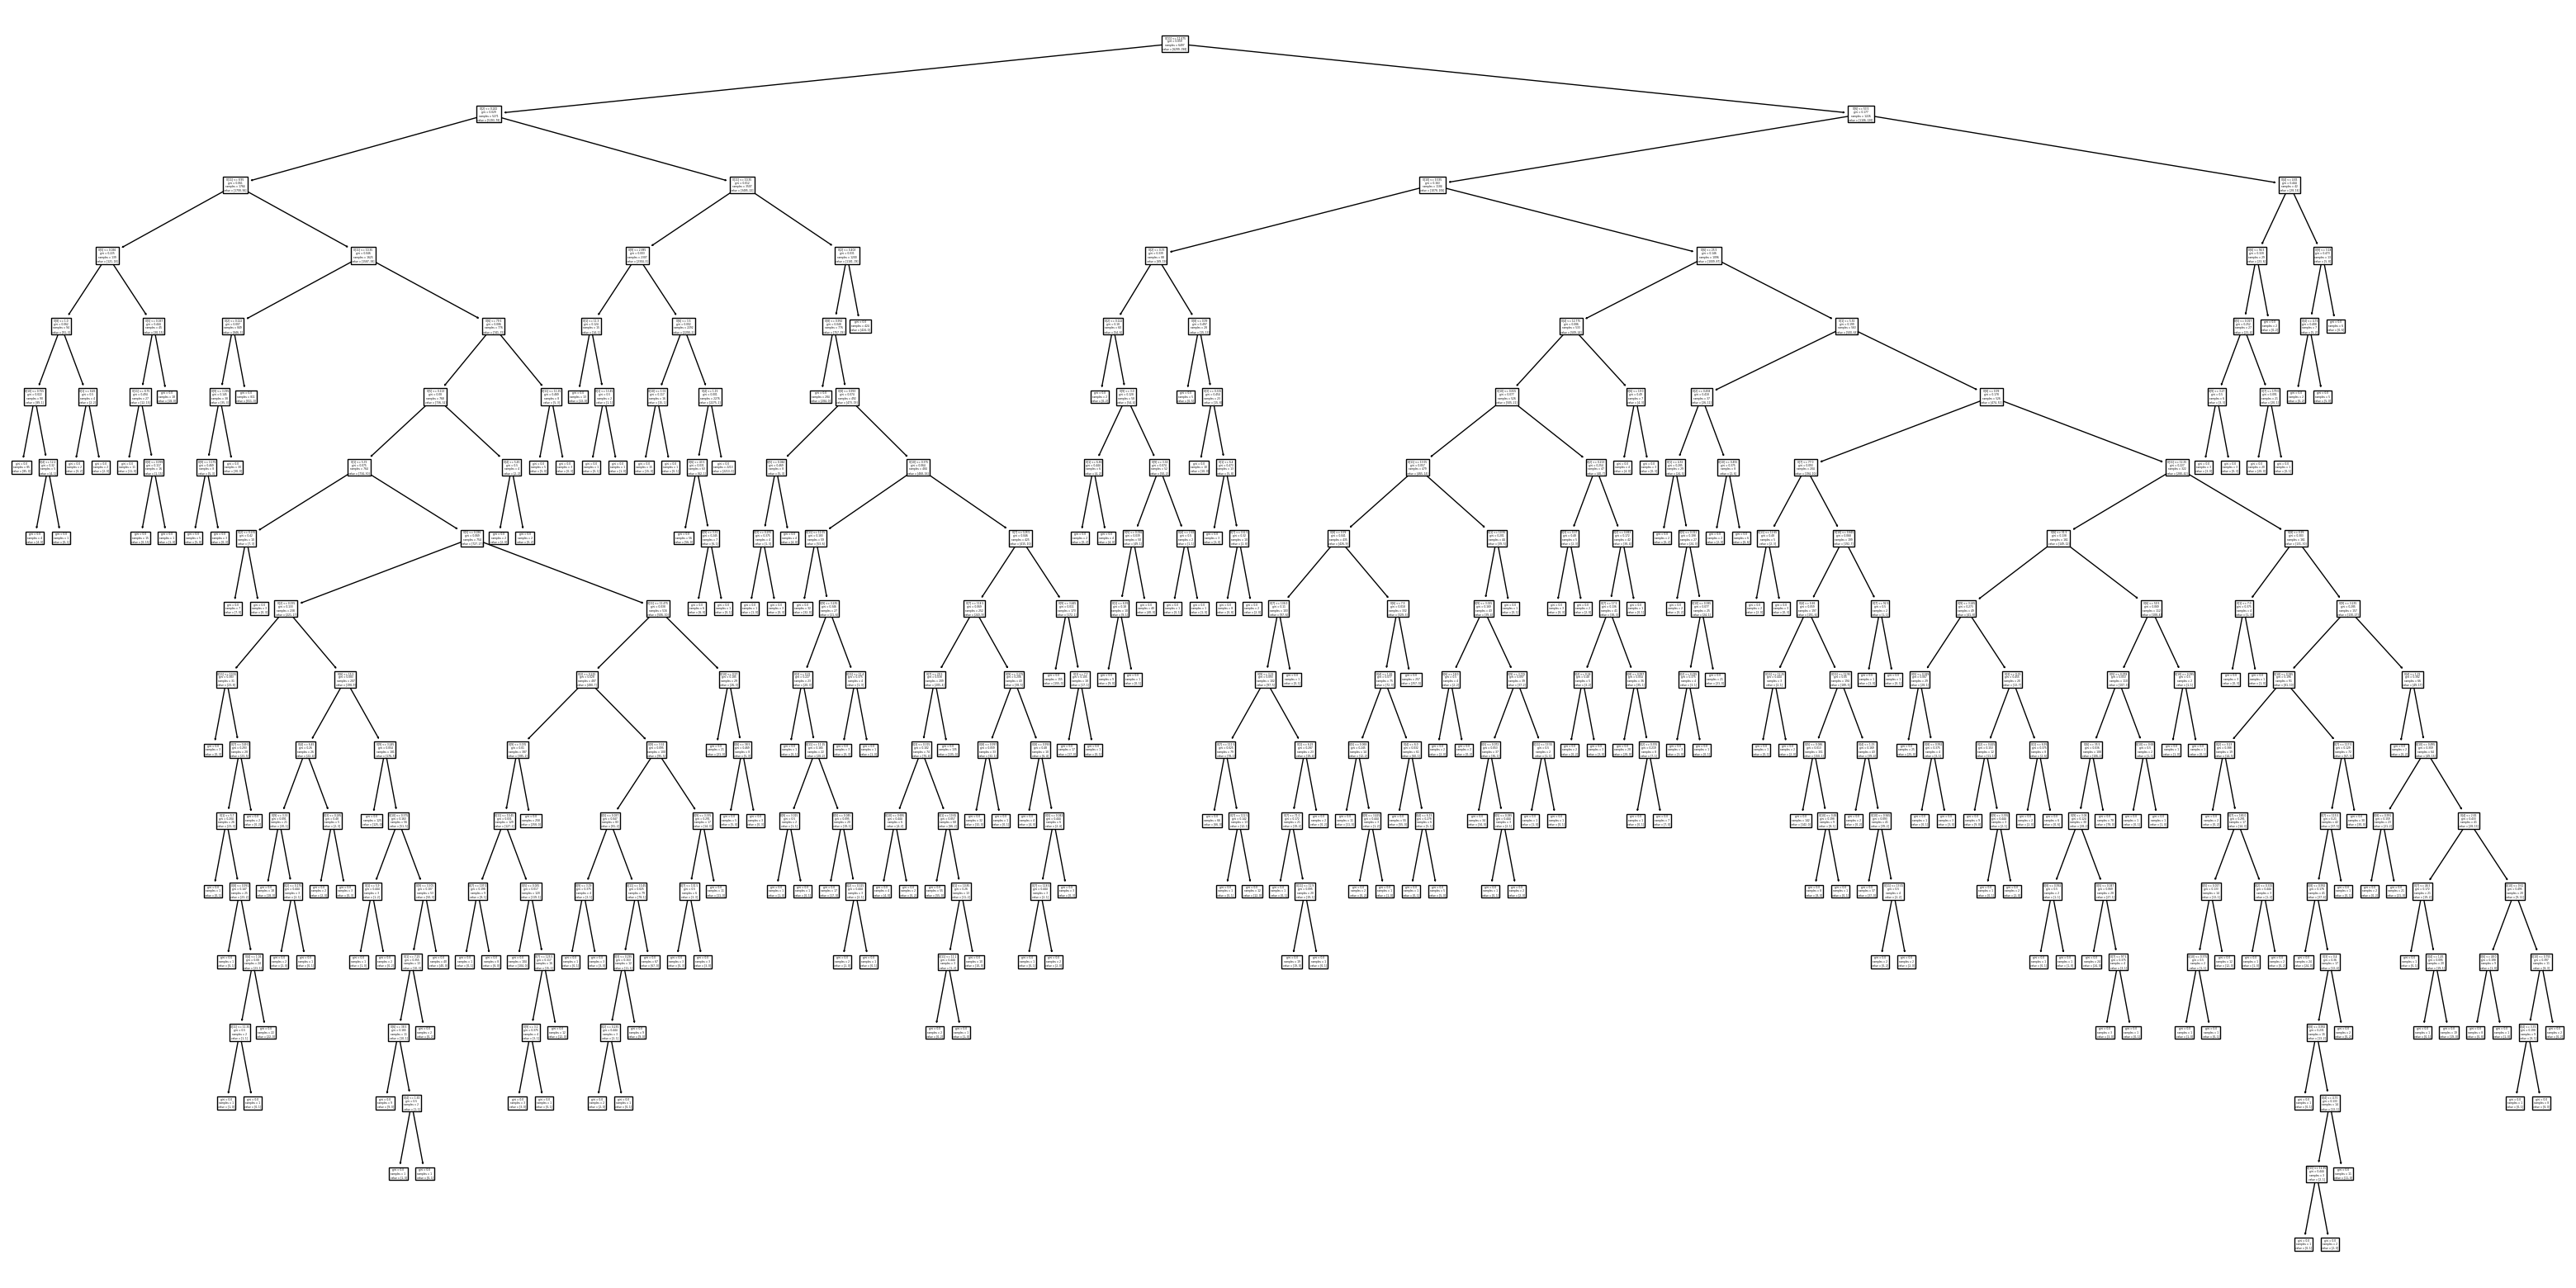

In [28]:
from sklearn import tree
plt.figure(figsize=(40,20))
fn = features
cn = wineData['best quality']
tree.plot_tree(decision.fit(features,wineData['best quality']))
plt.show()

In [30]:
input_data = [1,7.5,0.5,0.36,6.1,0.071,45.0,102.0,0.9978,3.35,0.8,100.5]

# changing the input data to a numpy array
convert = np.asarray(input_data)

# reshape the given data
reshape = convert.reshape(1,-1)

prediction = decision.predict(reshape)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


C:\Users\Danny\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [31]:
components = ["type" , "fixed acidity", "volatile acidity ","citric acid","residual sugar","chlorides"  ,"free sulfur dioxide" ,"total sulfur dioxide" ,"density" ,"pH" ,"sulphates","alcohol" ,
]

array = []

for i in range(12):
    array.append(int(input('Enter The Wine ' + components[i] )))

print(array)
    
    
convert = np.asarray(array)

# reshape the given data
reshape = convert.reshape(1,-1)

prediction = decision.predict(reshape)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Enter The Wine type4
Enter The Wine fixed acidity4
Enter The Wine volatile acidity 4
Enter The Wine citric acid4
Enter The Wine residual sugar4
Enter The Wine chlorides4
Enter The Wine free sulfur dioxide4
Enter The Wine total sulfur dioxide4
Enter The Wine density4
Enter The Wine pH4
Enter The Wine sulphates4
Enter The Wine alcohol4
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[0]
Bad Quality Wine


C:\Users\Danny\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [32]:
from tkinter import *

In [45]:


def printData(firstName, lastName):
    print(firstName)
    print(lastName)
    root.destroy()

def get_input():

    name_1 = entry1.get()
    name0 = entry2.get()
    name1=entry5.get()
    name2=entry6.get()
    name3=entry7.get() 
    name4=entry8.get()
    name5=entry9.get()
    name6=entry10.get()
    name7=entry11.get()
    name8=entry12.get()
    name9=entry13.get()
    name10=entry4.get()
    
#     printData(firstname, lastname)
    
#     array = [entry1.get(),entry2.get(),entry4.get()]
    array = [int(name_1),int(name0),int(name1),int(name2),int(name3),int(name4),int(name5),int(name6),int(name7),int(name8),int(name9),int(name10)]
    print(array)
    convert = np.asarray(array)

    # reshape the given data
    reshape = convert.reshape(1,-1)w

    prediction = decision.predict(reshape)
    print(prediction)

    if (prediction[0]==1):
      print('Good Quality Wine')
    else:
      print('Bad Quality Wine')


root = Tk()


root.minsize(400, 360)
#Label 1
label1 = Label(root,text = 'type')
label1.pack()
label1.config(justify = CENTER)

entry1 = Entry(root, width = 30)
entry1.pack()

label3 = Label(root, text="fixed acidity")
label3.pack()
label1.config(justify = CENTER)

entry2 = Entry(root, width = 30)
entry2.pack()

label4 = Label(root,text = 'volatile acidity')
label4.pack()
label1.config(justify = CENTER)

entry4 = Entry(root, width = 30)
entry4.pack()

label5 = Label(root, text="citric acid")
label5.pack()
label1.config(justify = CENTER)

entry5 = Entry(root, width = 30)
entry5.pack()

label6 = Label(root,text = 'residual sugar')
label6.pack()
label1.config(justify = CENTER)

entry6 = Entry(root, width = 30)
entry6.pack()

label7 = Label(root, text="chlorides")
label7.pack()
label1.config(justify = CENTER)

entry7 = Entry(root, width = 30)
entry7.pack()

label8 = Label(root,text = 'free sulfur dioxide')
label8.pack()
label1.config(justify = CENTER)

entry8 = Entry(root, width = 30)
entry8.pack()

label9 = Label(root, text="total sulfur dioxide")
label9.pack()
label1.config(justify = CENTER)

entry9 = Entry(root, width = 30)
entry9.pack()

label10 = Label(root,text = 'density')
label10.pack()
label1.config(justify = CENTER)

entry10 = Entry(root, width = 30)
entry10.pack()

label11 = Label(root, text="PH")
label11.pack()
label1.config(justify = CENTER)

entry11 = Entry(root, width = 30)
entry11.pack()

label12= Label(root,text = 'sulphate')
label12.pack()
label1.config(justify = CENTER)

entry12 = Entry(root, width = 30)
entry12.pack()

label13 = Label(root, text="alcohol")
label13.pack()
label1.config(justify = CENTER)

entry13 = Entry(root, width = 30)
entry13.pack()
button1 = Button(root, text = 'submit')
button1.pack() 
button1.config(command = get_input)

root.mainloop()

[1, 23, 34, 23, 1, 1, 1, 1, 11, 1, 100, 45]
[1]
Good Quality Wine


C:\Users\Danny\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
